###Load dataset from kaggle

In [1]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:08<00:00, 87.5MB/s]
100% 1.06G/1.06G [00:08<00:00, 128MB/s] 


In [ ]:
!unzip /content/dogs-vs-cats.zip

###Importing Libraries

In [7]:
# importing liraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.backend import batch_normalization

In [ ]:
# CNN architecture
# Conv layer --> Pooling Layer --> Flatten --> FC layer (neurons) --> o/p
# convolutional layer --> padding,strides

In [8]:
# The data is very huge. While passing all data at once memory crashes
# So using concept "Generators" for passing data in batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int', # 0 for cat, 1 for dog (2 classes)
    batch_size=128,
    image_size=(256,256) # b/c images are of random size
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=128,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# Now data will be stored in the form of numpy arrays i.e values
# b/w 0-255. We need to normalize them for good results
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

###CNN Model

In [ ]:
# Hyperparameter tuning
# Case1. conv2D --> 32 , hidden layera = 3 (32,32,32), batch size=64,64 epochs= 10  ==> vloss=0.96 10ep
# Case2. conv2D --> 32 , hidden layera = 3 (32,32,32), batch size=128,128 epochs= 10  ==> vloss>1 at 10ep
# Case3. conv2D --> 64,32,16 , hidden layera = 4 (16,16,16), batch size=128,128 epochs= 10  ==> vloss 0.60 ep10
# Case4. conv2D --> 64,32,16 , hidden layera = 6 (16,16,16), batch size=128,128 epochs= 10  ==> vloss 0.46 ep10
# Case5. conv2D --> 16,16,16 , hidden layers = 4 (8,8,8,8),   batch size=128,64 epochs= 100

In [10]:
#CNN Model
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [12]:
# model compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# callback = EarlyStopping(
#     monitor = "val_loss",
#     min_delta = 0.00001,
#     patience = 20,
#     verbose = 1,
#     mode = "auto",
#     baseline = None,
#     restore_best_weights = False
# )

In [13]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
157/157 [==============================] - 76s 385ms/step - loss: 0.6547 - accuracy: 0.5840 - val_loss: 0.6258 - val_accuracy: 0.6558
Epoch 2/10
157/157 [==============================] - 56s 351ms/step - loss: 0.5628 - accuracy: 0.7089 - val_loss: 0.5326 - val_accuracy: 0.7286
Epoch 3/10
157/157 [==============================] - 58s 359ms/step - loss: 0.5147 - accuracy: 0.7426 - val_loss: 0.5165 - val_accuracy: 0.7468
Epoch 4/10
157/157 [==============================] - 58s 363ms/step - loss: 0.4840 - accuracy: 0.7653 - val_loss: 0.4953 - val_accuracy: 0.7610
Epoch 5/10
157/157 [==============================] - 57s 354ms/step - loss: 0.4481 - accuracy: 0.7879 - val_loss: 0.4942 - val_accuracy: 0.7634
Epoch 6/10
157/157 [==============================] - 57s 351ms/step - loss: 0.4152 - accuracy: 0.8040 - val_loss: 0.4455 - val_accuracy: 0.7984
Epoch 7/10
157/157 [==============================] - 59s 369ms/step - loss: 0.3774 - accuracy: 0.8296 - val_loss: 0.4466 - val_ac

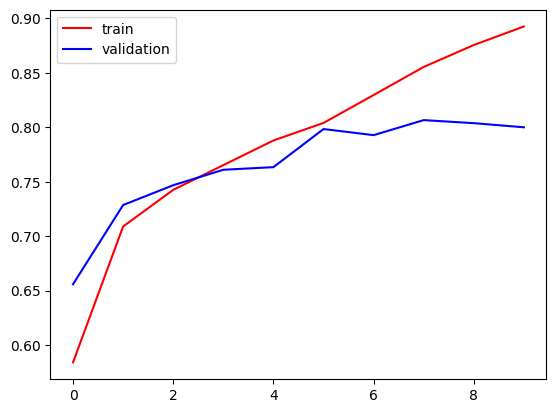

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

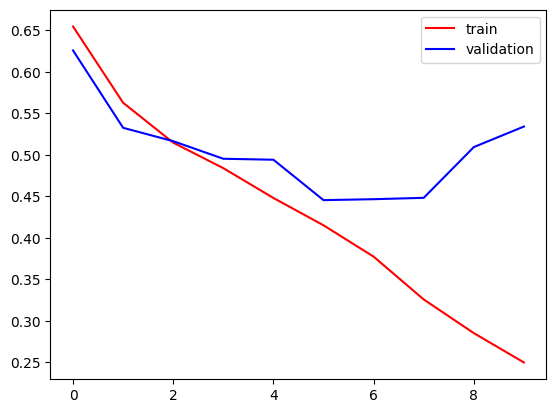

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# Testing model on new data

In [16]:
import cv2

In [22]:
test_img = cv2.imread('/content/dog.jpg')

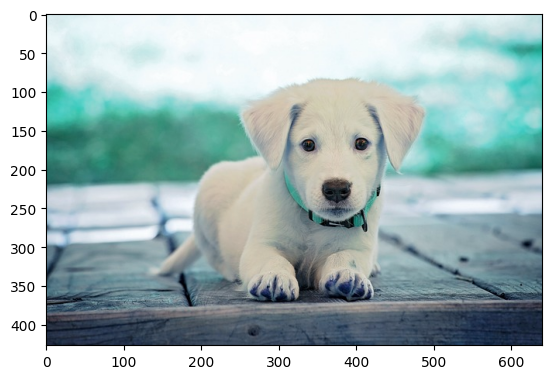

In [23]:
plt.imshow(test_img)

In [24]:
test_img = cv2.resize(test_img,(256,256))

In [25]:
test_input = test_img.reshape((1,256,256,3))

In [26]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

### save model

In [27]:
# Save model architecture as JSON
model_json = model.to_json()
with open("catDogClass_model.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights
model.save_weights("catDogClass_model_weights.h5")

In [28]:
# Load JSON and create model
with open("catDogClass_model.json", "r") as json_file:
    loaded_model_json = json_file.read()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)

# Load weights into new model
loaded_model.load_weights("catDogClass_model_weights.h5")

In [43]:
from PIL import Image
import numpy as np

# Function to preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((256, 256))
    img_array = np.array(img) / 255.0  # Normalize pixel values
    return img_array.reshape(-1, 256, 256, 3)

# Example usage
image_path = "/content/dog.jpg"  # Replace with the path to your image
processed_image = preprocess_image(image_path)

# Make prediction
prediction = loaded_model.predict(processed_image)

# Interpret the prediction
if prediction[0][0] > 0.5:
    print("Predicted: Dog")
else:
    print("Predicted: Cat")


1/1 [==============================] - 0s 71ms/step
Predicted: Cat
